In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
arch = resnext50
sz=320
bs = 32
path='data/hackerearth-myntra'

In [3]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [4]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs,num_workers=2)

In [5]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.4)

100%|██████████| 428/428 [05:12<00:00,  1.37it/s]


In [6]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 79%|███████▊  | 1343/1709 [00:17<00:04, 78.54it/s, loss=5.89]

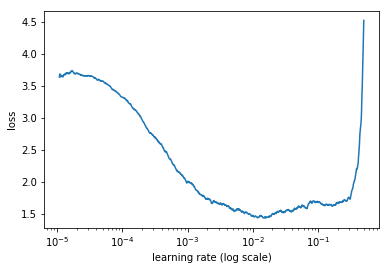

In [7]:
learn.sched.plot()

In [8]:
learn.fit(0.0005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

 17%|█▋        | 294/1709 [00:07<00:35, 40.37it/s, loss=1.91]

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      1.445188   1.220794   0.659463  
    1      1.280851   1.145221   0.671291                      
    2      1.226473   1.103146   0.68144                      
    3      1.14365    1.07947    0.687573                      
    4      1.109671   1.062457   0.693706                      



[1.062457, 0.69370619158878499]

In [9]:
learn.fit(0.0005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      1.117228   1.054124   0.69429   
    1      1.146727   1.040617   0.694801                      
    2      1.081234   1.02786    0.699547                      
    3      1.09891    1.023967   0.699255                     
    4      1.04428    1.013407   0.704147                      



[1.0134075, 0.70414719626168221]

In [10]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      1.069414   1.01245    0.702322  
    1      1.050183   1.012361   0.701154                      
    2      1.033319   1.010906   0.702176                       
    3      1.019665   1.006886   0.703417                      
    4      1.044197   1.00243    0.70422                       



[1.0024304, 0.70422021028037385]

In [11]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      1.029525   1.005961   0.704439  
    1      1.034748   1.003003   0.704439                      
    2      1.075735   1.001838   0.704804                      
    3      1.038453   1.005497   0.703344                      
    4      1.054383   1.00035    0.706411                      



[1.0003496, 0.70641063084112155]

In [12]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [13]:
log_preds,y = learn.TTA()


In [14]:
probs = np.mean(np.exp(log_preds),0)

In [15]:
accuracy_np(probs, y)

0.70610184372256368

In [16]:
y[10]=9

In [17]:
predictions = np.argmax(probs,axis=1)

In [18]:
cm = confusion_matrix(y, predictions)

Confusion matrix, without normalization
[[  80    5    3    0    7   10   24   36   94    0    4    0   25    0    1   52    0    0   18    8    1
     0   86    0]
 [   3   34    1    0    0    0    0    0   17    0    0    0   11    0    0    2    0    0    0    1    0
     0   55    0]
 [   6    0   17    0    2    1    2    1    4    0    0    0    0    0    0    5    0    0    1    0    0
     0    6    0]
 [   0    0    0   18    0    0    0    7    0    0    1    0    0    0    0   10    0    0   10    0    0
     0    0    0]
 [   3    0    0    0  261    0    1    3    5    0    0    0    0    0    0  182    0    0   34    0    0
     0   24    0]
 [  19    1    0    0    0  103   17   31   30    0    2    0    3    0    0   13    0    0    4    3    1
     0   45    0]
 [  18    0    0    0    1   10  156   13   25    0    2    0    9    0    0   23    0    0    4    1    0
     0   45    0]
 [  20    1    1    1   12   22    8  158   23    0    1    0    3    0    0   81    

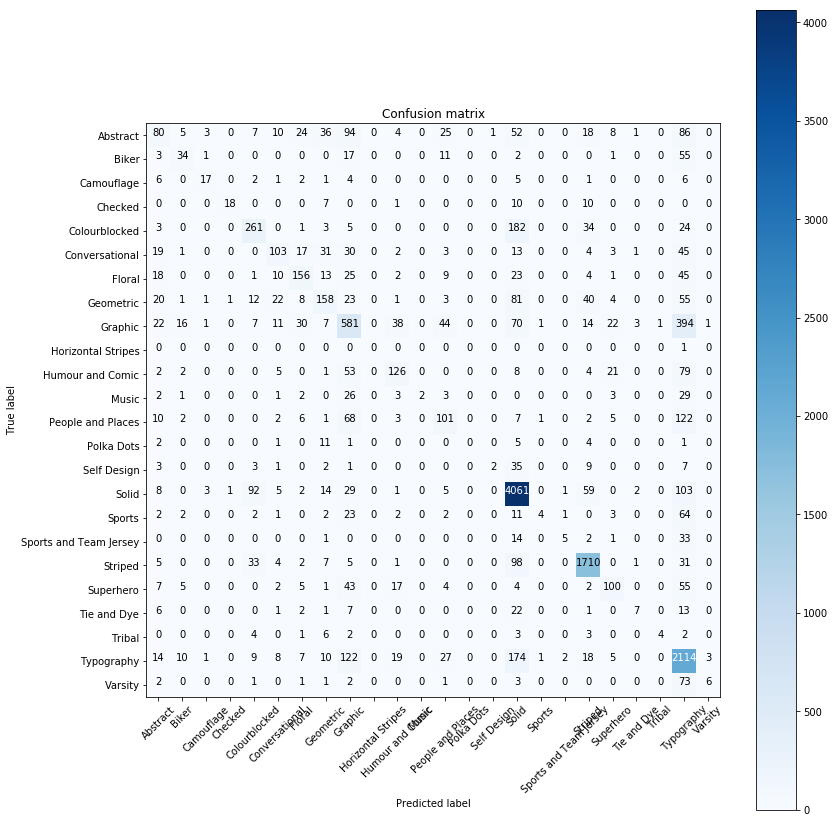

In [19]:
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.17621  0.01101  0.00661  0.       0.01542  0.02203  0.05286  0.0793   0.20705  0.       0.00881  0.
   0.05507  0.       0.0022   0.11454  0.       0.       0.03965  0.01762  0.0022   0.       0.18943  0.     ]
 [ 0.02419  0.27419  0.00806  0.       0.       0.       0.       0.       0.1371   0.       0.       0.
   0.08871  0.       0.       0.01613  0.       0.       0.       0.00806  0.       0.       0.44355  0.     ]
 [ 0.13333  0.       0.37778  0.       0.04444  0.02222  0.04444  0.02222  0.08889  0.       0.       0.       0.
   0.       0.       0.11111  0.       0.       0.02222  0.       0.       0.       0.13333  0.     ]
 [ 0.       0.       0.       0.3913   0.       0.       0.       0.15217  0.       0.       0.02174  0.       0.
   0.       0.       0.21739  0.       0.       0.21739  0.       0.       0.       0.       0.     ]
 [ 0.00585  0.       0.       0.       0.50877  0.       0.00195  0.00585  0.00975  0.       0.       0.    

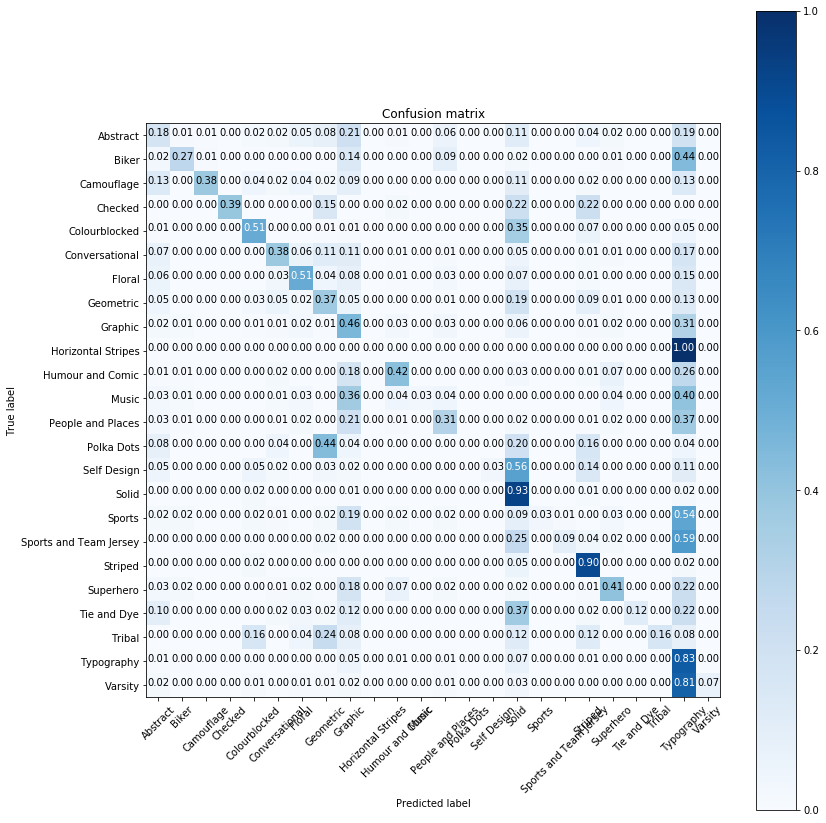

In [20]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

# 0.2 -> must overfit a bit 

In [21]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

In [22]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 79%|███████▉  | 1349/1709 [00:15<00:04, 87.65it/s, loss=5.43]

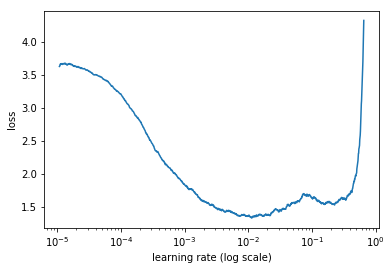

In [23]:
learn.sched.plot()

In [24]:
learn.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

  1%|          | 11/1709 [00:00<01:04, 26.35it/s, loss=3.03]

Exception in thread Thread-32:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      1.086589   1.066926   0.688668  
    1      1.053817   1.011268   0.700789                       
    2      0.965873   0.98612    0.707068                       
    3      0.887494   0.977782   0.711011                       
    4      0.907621   0.974305   0.715245                       



[0.97430521, 0.71524532710280375]

In [25]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.882788   0.972836   0.716779  
    1      0.794958   0.959712   0.724445                       



[0.95971203, 0.72444509345794394]

In [26]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.720073   0.980521   0.720502  
    1      0.712347   0.969756   0.726709                       



[0.96975553, 0.72670852803738317]

In [27]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.595106   0.955466   0.731308  
    1      0.619708   0.949801   0.732331                      
    2      0.555514   0.948763   0.734302                       
    3      0.560157   0.946749   0.735324                       
    4      0.575596   0.944807   0.734521                       



[0.94480669, 0.73452102803738317]

In [28]:
learn.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.551263   0.948501   0.734959  
    1      0.537321   0.943712   0.7362                         



[0.94371164, 0.73620035046728971]

In [29]:
learn.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.526305   0.946274   0.735397  
    1      0.542074   0.944341   0.736346                       



[0.94434088, 0.73634637850467288]

In [30]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.495076   0.942318   0.736857  
    1      0.529661   0.941937   0.737588                       
    2      0.519627   0.944916   0.737661                       
    3      0.505949   0.945938   0.737004                       
    4      0.505376   0.947931   0.736565                       



[0.94793147, 0.7365654205607477]

In [31]:
log_preds,y = learn.TTA()


In [32]:
probs = np.mean(np.exp(log_preds),0)

In [33]:
accuracy_np(probs, y)

0.73661106233538187

In [34]:
y[10]=9

In [35]:
predictions = np.argmax(probs,axis=1)

In [36]:
cm = confusion_matrix(y, predictions)

Confusion matrix, without normalization
[[ 136    4    4    1    3    7   20   37   72    0    6    0   20    0    3   40    2    0   15   15    3
     0   66    0]
 [   5   55    1    0    0    1    1    0   16    0    0    0    4    0    0    1    0    0    0    3    0
     0   37    0]
 [   5    0   19    0    2    0    4    1    6    0    0    0    0    0    0    3    0    0    1    0    0
     0    4    0]
 [   1    0    0   25    0    0    0    2    0    0    0    0    0    0    0   10    0    0    8    0    0
     0    0    0]
 [   1    0    0    1  278    1    1    5    6    0    1    0    0    0    0  161    0    0   39    0    0
     1   18    0]
 [  19    0    0    0    1  122   10   25   34    0    5    0    1    1    0   15    0    0    2    3    0
     0   34    0]
 [  20    1    0    0    0   11  173   11   25    0    3    0    8    0    0   17    0    0    6    1    2
     1   28    0]
 [  31    1    1    5    3   21    4  190   18    0    1    0    1    2    1   70    

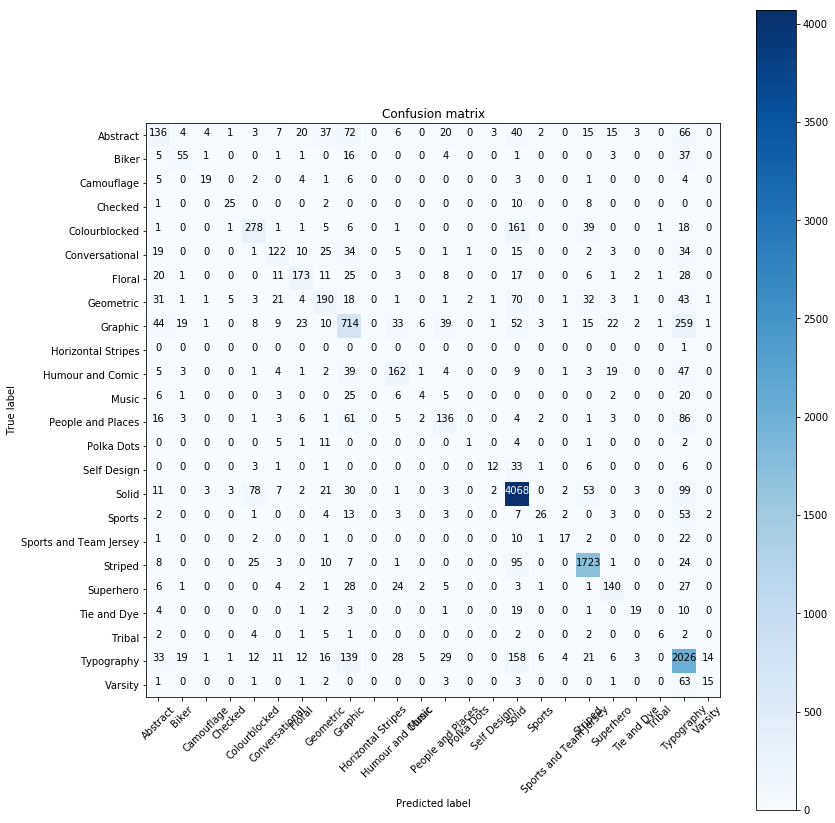

In [37]:
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.29956  0.00881  0.00881  0.0022   0.00661  0.01542  0.04405  0.0815   0.15859  0.       0.01322  0.
   0.04405  0.       0.00661  0.08811  0.00441  0.       0.03304  0.03304  0.00661  0.       0.14537  0.     ]
 [ 0.04032  0.44355  0.00806  0.       0.       0.00806  0.00806  0.       0.12903  0.       0.       0.
   0.03226  0.       0.       0.00806  0.       0.       0.       0.02419  0.       0.       0.29839  0.     ]
 [ 0.11111  0.       0.42222  0.       0.04444  0.       0.08889  0.02222  0.13333  0.       0.       0.       0.
   0.       0.       0.06667  0.       0.       0.02222  0.       0.       0.       0.08889  0.     ]
 [ 0.02174  0.       0.       0.54348  0.       0.       0.       0.04348  0.       0.       0.       0.       0.
   0.       0.       0.21739  0.       0.       0.17391  0.       0.       0.       0.       0.     ]
 [ 0.00195  0.       0.       0.00195  0.54191  0.00195  0.00195  0.00975  0.0117   0.       0.00195  0.    

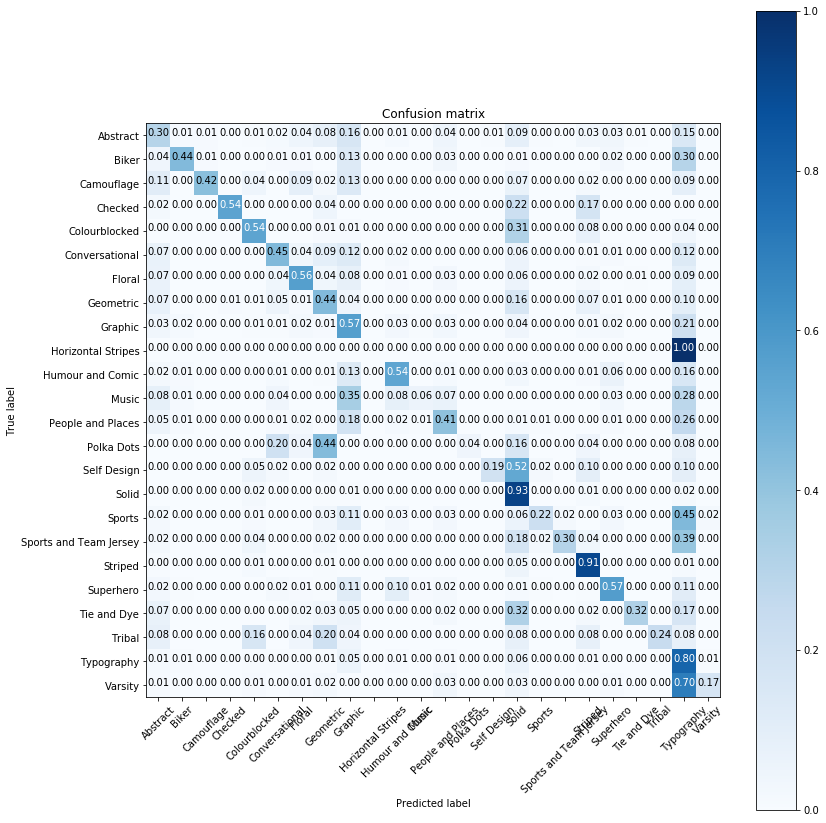

In [38]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [39]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
x,y=next(iter(data.val_dl))


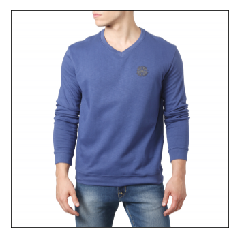

In [42]:
show_img(data.val_ds.denorm(to_np(x))[3]);